# Making a Predictive Model to detect Advisor Misconduct
### This is my academic project, here I implied the use of machine learning models to predict advisor misconduct in some of the insurance firms in the US. I have used models such as Logistic Regression and Random Forest to determine a relationship between different features of advisor misconduct. 
###### (Be advised this is still an ongoing project and I am tirelessly working to improve its accuracy)

#### Importing Libaries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv(r'C:\Users\Saad\OneDrive\Desktop\Acadamic Projects\Market Conduct Data Analyst\AdvisorMisconductData.csv')
df

,Broker ID,Firm name,Customer Income,Customer Insurance Premium,Number of Calls,Call Duration,Misconducts,Firm Ranking,Customer ID,YearsExperience,NumClients,AvgInvestment,Complaints,Misconducts.1
0,AF8378AF,Prudential Investment Management Services,64397,3872,4,1,0,203,KP664046KP,10.993428,26,37680.418743,2,0
1,BG2124BG,Ameritas Investment,181800,4072,18,5,1,110,LQ416456LQ,9.723471,64,51452.267771,1,0
2,CH1697CH,Princor Financial Services Corporation,169180,2854,37,20,0,315,MR430814MR,11.295377,98,52359.997567,4,1
3,BG3179BG,Ameritas Investment,116234,1566,25,8,1,110,LQ182279LQ,13.046060,59,52326.763579,1,0
4,BG6251BG,Ameritas Investment,89954,3418,48,43,0,110,LQ115434LQ,9.531693,56,45198.774102,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,EJ4259EJ,Wells Fargo Advisors Financial Network,126589,3050,29,52,1,1,OT314764OT,11.077820,22,51134.000633,3,0
496,CH2823CH,Princor Financial Services Corporation,72116,4500,10,23,0,315,MR681793MR,7.925508,69,58684.435107,3,0
497,EJ2474EJ,Wells Fargo Advisors Financial Network,182717,2165,12,26,0,1,OT972328OT,9.619323,56,32039.710135,6,1
498,EJ3242EJ,Wells Fargo Advisors Financial Network,174085,1375,30,4,0,1,OT642423OT,8.248763,33,63112.102304,5,1


### Visualizing the features in our dataset
#### I have skipped feature engineering as our dataset has no null or duplicate values 

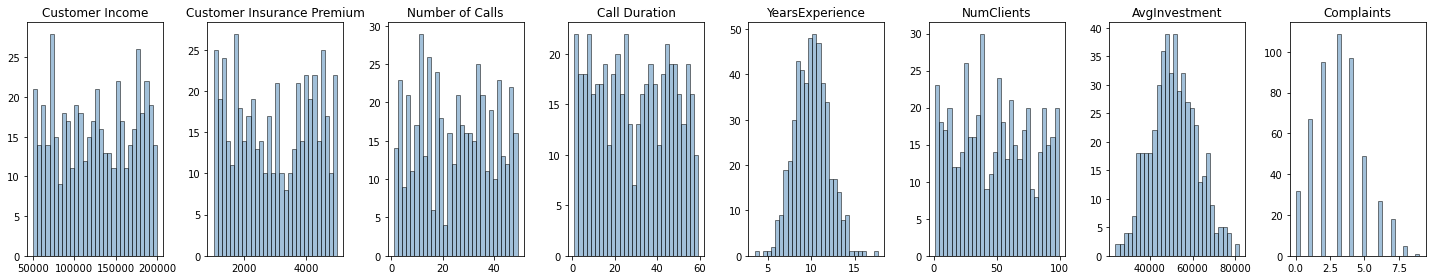

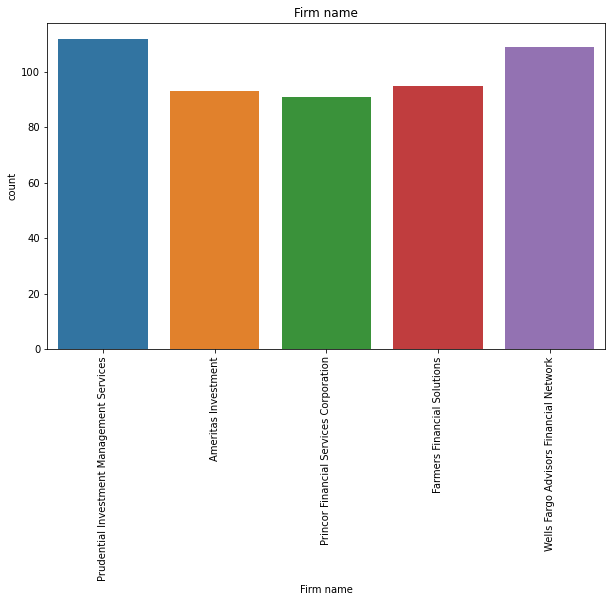

In [54]:
# Define numerical and categorical features
num_features = ['Customer Income', 'Customer Insurance Premium', 'Number of Calls', 'Call Duration', 'YearsExperience', 'NumClients', 'AvgInvestment', 'Complaints']
cat_features = ['Firm name']

# Plot histograms for numerical features
fig, axs = plt.subplots(1, len(num_features), figsize=(20, 4))

for i, feature in enumerate(num_features):
    axs[i].hist(df[feature], bins=30, alpha=0.5, color='steelblue', edgecolor='black')
    axs[i].set_title(feature)

plt.tight_layout()
plt.show()

# Plot bar plots for categorical features
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df, x=cat_features[0], ax=ax)
plt.title(cat_features[0])
plt.xticks(rotation=90)
plt.show()

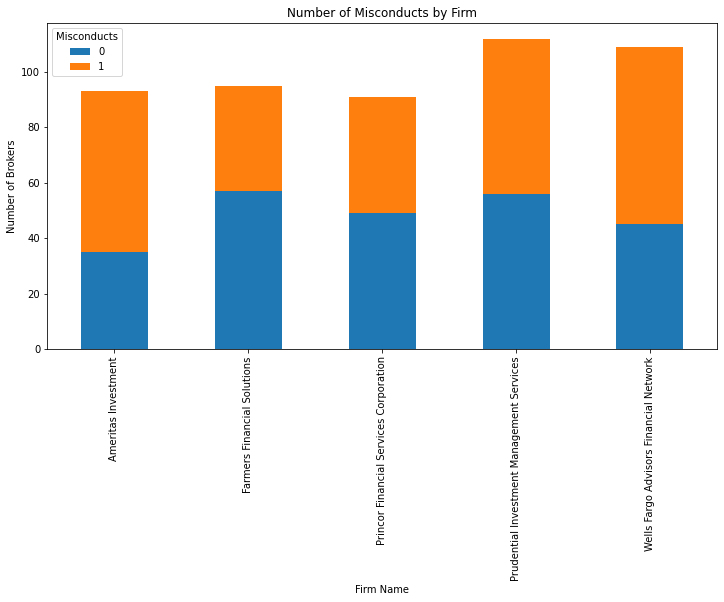

In [4]:
# Creating a cross-tabulation of Firm name and Misconducts
firm_misconduct = pd.crosstab(df['Firm name'], df['Misconducts'])

# Ploting stacked bar plot
firm_misconduct.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Number of Misconducts by Firm')
plt.ylabel('Number of Brokers')
plt.xlabel('Firm Name')
plt.xticks(rotation=90)
plt.show()

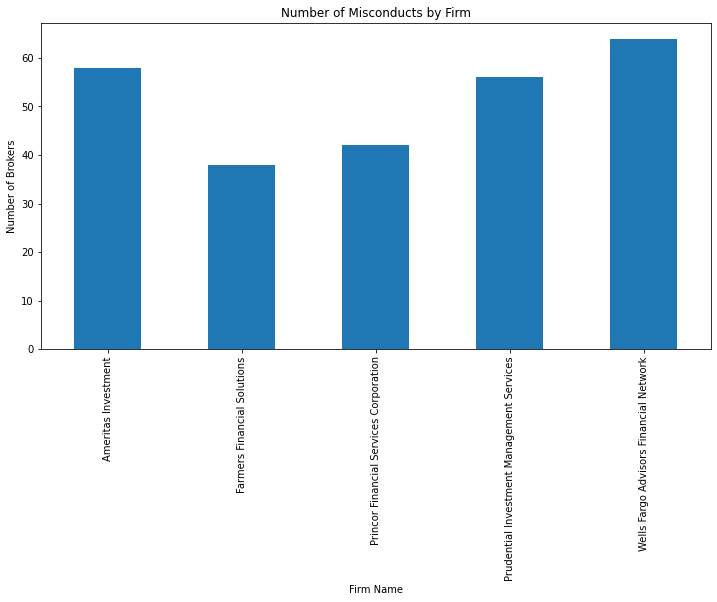

In [5]:
# Creating a cross-tabulation of Firm name and Misconducts for misconducts only (value of 1)
firm_misconduct = pd.crosstab(df[df['Misconducts'] == 1]['Firm name'], df['Misconducts'])

# Plotting bar plot
firm_misconduct.plot(kind='bar', stacked=True, figsize=(12, 6), legend=False)

plt.title('Number of Misconducts by Firm')
plt.ylabel('Number of Brokers')
plt.xlabel('Firm Name')
plt.xticks(rotation=90)
plt.show()

### Creating a heatmap to visualize the corrilation within the features

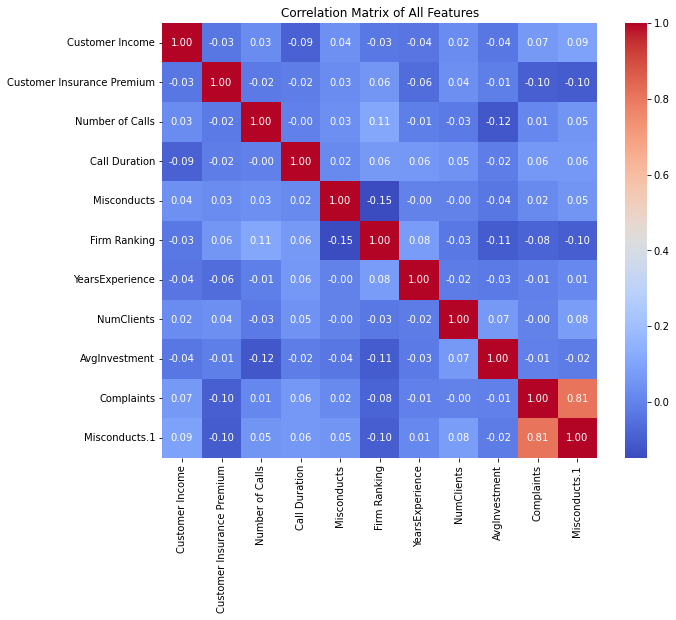

In [13]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

plt.title('Correlation Matrix of All Features')
plt.show()

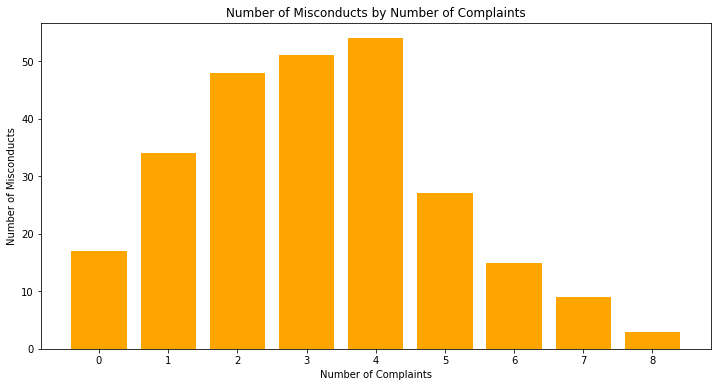

In [11]:
# Filter the data to include only instances of misconduct
misconduct_data = df[df['Misconducts'] == 1]

# Count the number of instances for each number of complaints
misconduct_counts = misconduct_data['Complaints'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(misconduct_counts.index, misconduct_counts.values, color='orange')
plt.title('Number of Misconducts by Number of Complaints')
plt.xlabel('Number of Complaints')
plt.ylabel('Number of Misconducts')
plt.xticks(list(range(misconduct_counts.index.max() + 1)))
plt.show()

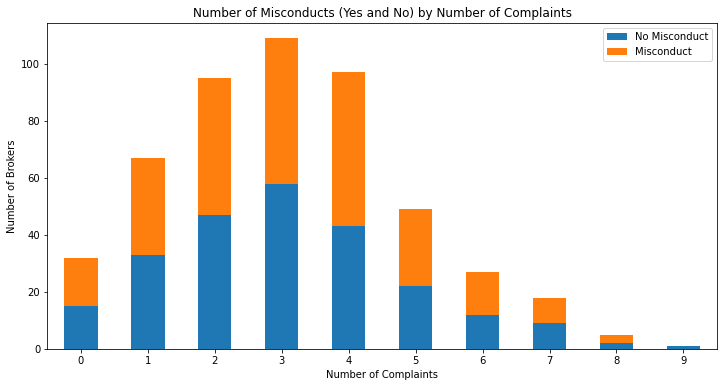

In [12]:
# Count the number of instances for each number of complaints, grouped by misconduct status
complaints_counts = df.groupby('Misconducts')['Complaints'].value_counts().unstack(0)

# Replace NaN values with 0
complaints_counts = complaints_counts.fillna(0)

# Create a stacked bar plot
complaints_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Misconducts (Yes and No) by Number of Complaints')
plt.ylabel('Number of Brokers')
plt.xlabel('Number of Complaints')
plt.xticks(rotation=0)
plt.legend(['No Misconduct', 'Misconduct'])
plt.show()

## Implimenting logistic regression model for prediction of advisor misconduct

In [53]:
# Logistic Regression model
# Split the dataset into features and target variable
X = df[['YearsExperience', 'NumClients', 'AvgInvestment', 'Complaints']]
y = df['Misconducts']

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.51      1.00      0.68        51

    accuracy                           0.51       100
   macro avg       0.26      0.50      0.34       100
weighted avg       0.26      0.51      0.34       100



C:\Users\Saad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Saad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Saad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Implimenting a random forest model for misconduct detection

In [51]:
# Random Forest model
# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=20)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.57      0.53      0.55        49
           1       0.57      0.61      0.59        51

    accuracy                           0.57       100
   macro avg       0.57      0.57      0.57       100
weighted avg       0.57      0.57      0.57       100

